In [1]:
# To start, we load the data into python

In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()

In [2]:
timeseries,y = load_robot_execution_failures()

In [5]:
# and end up with a pandas.DataFrame timeseries having the following shape

timeseries.head(6)
# timeseries.shape  #(1320, 8)


,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
5,1,5,-1,-1,63,-3,-1,0


In [6]:
# The first column is the DataFrame index and has no meaning here. There are six different time series (F_x, F_y, F_z, T_x, T_y, T_z) for the different sensors. The different robots are denoted by the ids column.

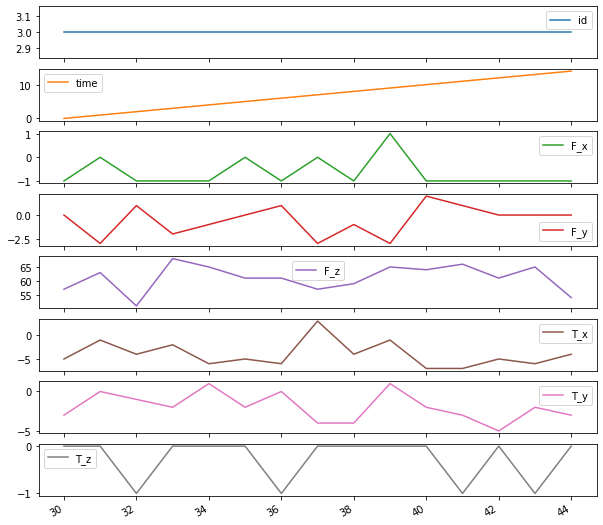

In [10]:
# In the following we illustrate the time series of the sample id 3 reporting no failure:

import matplotlib.pyplot as plt
timeseries[timeseries['id']==3].plot(subplots=True,sharex=True,figsize=(10,10))
plt.show()


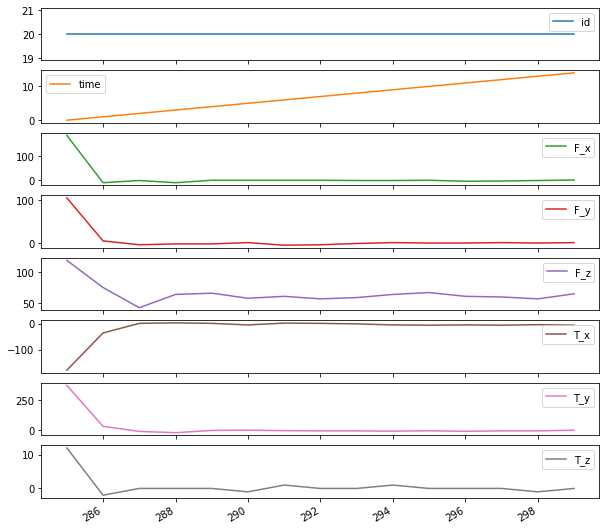

In [13]:
# And for id 20 reporting a failure:
timeseries[timeseries['id']==20].plot(subplots=True,sharex=True,figsize=(10,10))
plt.show()

In [15]:
# For extracting all features, we do:
from tsfresh import extract_features
features = extract_features(timeseries,column_id="id",column_sort="time")
print(features)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


    F_x__variance_larger_than_standard_deviation  F_x__has_duplicate_max  \
1                                            0.0                     0.0   
2                                            0.0                     1.0   
3                                            0.0                     0.0   
4                                            0.0                     1.0   
5                                            0.0                     0.0   
..                                           ...                     ...   
84                                           1.0                     1.0   
85                                           1.0                     0.0   
86                                           1.0                     0.0   
87                                           1.0                     1.0   
88                                           1.0                     0.0   

    F_x__has_duplicate_min  F_x__has_duplicate  F_x__sum_values  \
1                   

In [19]:
# We will now remove all NaN values (that were created by feature calculators, than can not be used on the given data, e.g. because it has too low statistics) and select only the relevant features next:

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(features)
features_filtered = select_features(features,y)
print(features_filtered)

    F_x__value_count__value_-1  F_x__abs_energy  F_x__root_mean_square  \
1                         14.0             14.0               0.966092   
2                          7.0             25.0               1.290994   
3                         11.0             12.0               0.894427   
4                          5.0             16.0               1.032796   
5                          9.0             17.0               1.064581   
..                         ...              ...                    ...   
84                         0.0          96833.0              80.346334   
85                         0.0           1683.0              10.592450   
86                         0.0          83497.0              74.608757   
87                         0.0        1405437.0             306.097697   
88                         0.0           1427.0               9.753632   

    F_x__range_count__max_1__min_-1  F_y__abs_energy  F_y__root_mean_square  \
1                              1

In [ ]:
# Further, you can even perform the extraction, imputing and filtering at the same time with the tsfresh.extract_relevant_features() function:
from tsfresh import extract_relevant_features
features_filtered_direct = extract_relevant_features(timeseries,y,column_id='id',column_sort='time')




Feature Extraction:   0%|                                                                       | 0/20 [00:00<?, ?it/s]